# Aufgabe 9 Der Metropolis-Hastings-Algorithmus



### Aufgabenteil a)

Für eine gegebene Wahrscheinlichkeitsverteilung $W(x)$ ist die Wahrscheinlichkeit, dass ein Punkt vom Metropolis-Hastings-Algorithmus angenommen wird 
$$P=\text{min}\left(1,\frac{W(x)P(x|y)}{W(Y)|P(y|x)}\right)$$
für eine symmetrische Funktion $P(x)$ gilt dabei
$$P(x|y)=P(y|x)$$
Dadurch kürzt sich die Wahrscheinlichkeit zur Annahme eines Punktes zu
$$P=\text{min}\left(1,\frac{W(x)}{W(Y)}\right)$$
Dies entspricht dem Metropolis-Algorithmus.

### Aufgabenteil b)

Der Algorithmus orientiert am Ablaufschema aus der Vorlesung:

In [66]:
import numpy as np
import matplotlib.pyplot as plt


In [67]:
def f(x):
    return (15*x**3)/((np.pi)**4*(np.exp(x)-1))

def fMetro(s,x0,number):
    w = [x0]    #Hier werden die Ausgabewerte gespeichert
    time=[0]    #Hier werden die Iterationen für den Trace Plot mit gezählt
    for i in range(1,number):
        y=w[i-1]+np.random.uniform(-s,s)   #Gehe einen zufälligen Schritt innerhalb der Schrittweite s
        while min(1,f(y)/f(w[i-1])) < np.random.uniform(0,1) or y < 0: #inverses Annahmekriterium + Definitionsbereich
            y=w[i-1]+np.random.uniform(-s,s) #Neuer Schritt bei Ablehnung
        w.append(y) #Wird der Schritt angenommen, so wird der Wert der Ausgabe hinzu gefügt
        time.append(i) #Die Iteration wird mitgezählt
    return time,w
        
    

### Aufgabenteil c)

Im folgenden die Simulation mit den angegebenen Parametern verglichen mit der Verteilungsfunktion:

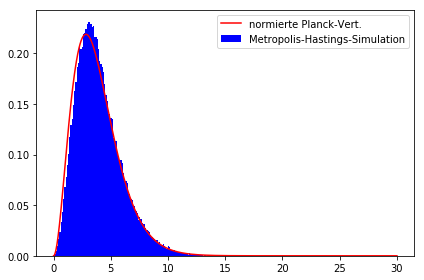

In [68]:
t,w=fMetro(2,30,100000) #Die Verteilung wird nach Angaben erstellt..
plt.hist(w,bins='auto',normed=True,color='blue',label='Metropolis-Hastings-Simulation')#..und geplottet
ln = np.linspace(0.000001,30, 1000)
plt.plot(ln,f(ln),'r-',label='normierte Planck-Vert.')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Aufgabenteil d)

Im folgenden Traceplot ist zu erkennen welcher Wert bei welcher Iteration erzeugt wurde. Zu Beginn ist eine Nahezu 
senkrechte gerade zu sehen welche fom Startwert zum Häufungswert (Maximum der Planckfuntion läuft).
Der Algorithmus braucht hierzu ca. 40 Iterationen. Danach hält sich der Algorithmus meist in der
Häufungsregion auf mit seltenen gelegentlichen ausschlägen, welche im gewichteten Plot jedoch kaum noch zu sehen sind.
Die positve Flanke fällt dabei wesentlich flacher, wie es die Verteilungsfunktion erwarten lässt.

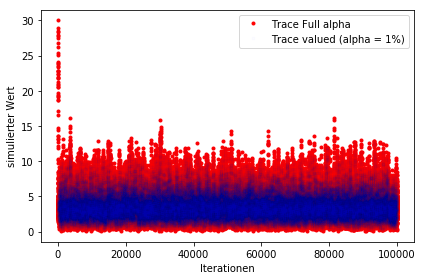

In [69]:
plt.plot(t,w,'r.',label='Trace Full alpha')
plt.plot(t,w,'b.',alpha=0.01,label='Trace valued (alpha = 1%)')
plt.xlabel('Iterationen')
plt.ylabel('simulierter Wert')
plt.legend(loc='best')
plt.tight_layout()
plt.show()